In [7]:
import pandas as pd
import numpy as np
# import datetime
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
from datetime import datetime
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='default')

In [8]:
fn_temp = '/mnt/d/ubuntu/projects/gatechProjects/StochSM/data/{prod}/100570016.csv'

In [9]:
sm_prods = ['smap', 'smos']
sm = dict()
for prod in sm_prods:
    sm[prod] = pd.read_csv(fn_temp.format(prod=prod))
    sm[prod]['dt'] = pd.to_datetime(sm[prod]['dt'])

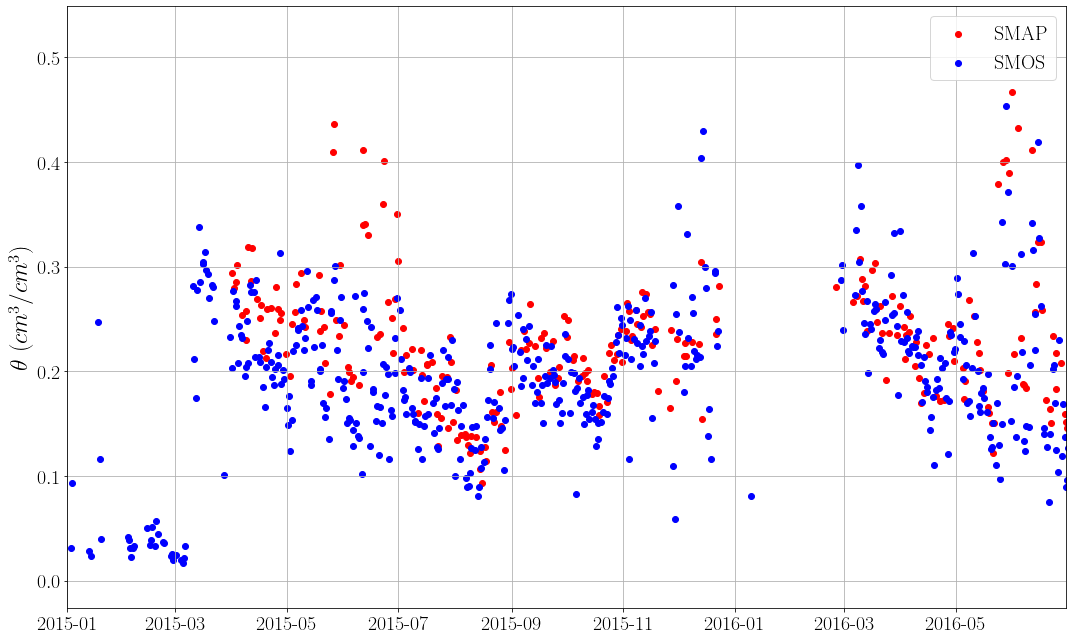

In [16]:
fig,ax = plt.subplots(figsize=(15, 9))
ax.tick_params(labelsize = 20)
ax.set_ylabel(r'$\theta \ (cm^3/cm^3)$', fontsize = 24)
# ax.set_xlabel(r'Initial Soil Moisture \ ($mm$)', fontsize = 24)
ax.tick_params(labelsize = 20)
plt.scatter(sm['smap']['dt'],sm['smap']['sm'], color='red', label = 'SMAP')
plt.scatter(sm['smos']['dt'],sm['smos']['sm'], color='blue', label = 'SMOS')
# plt.plot(mean_sm[4][4][:,0],mean_sm[4][4][:,1], color='blue', label = 'April - 4th')
ax.set_xlim([datetime(2015,1,1), datetime(2016, 6,30)])
ax.grid('major')
ax.legend(fontsize=20)
# ax.set_ylim([0,])
fig.tight_layout()
# fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/satellite_sm/smap_smos_2015_2016.jpg', dpi=300)

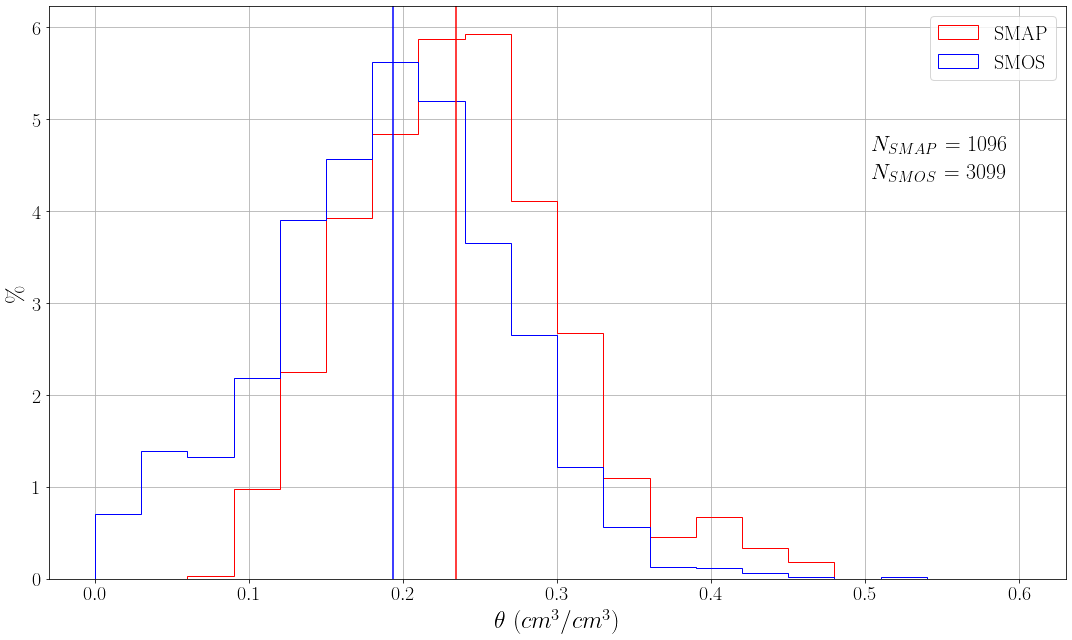

In [104]:
fig,ax = plt.subplots(figsize=(15, 9))
ax.tick_params(labelsize = 20)
ax.set_ylabel(r'$\%$', fontsize = 24)
ax.set_xlabel(r'$\theta \ (cm^3/cm^3)$', fontsize = 24)
ax.tick_params(labelsize = 20)
ax.hist(sm['smap']['sm'], bins = 20, range=[0,0.6], density=True,edgecolor='red',histtype='step',cumulative=False,label = 'SMAP', fc=(0, 0, 0, 0.5))
ax.hist(sm['smos']['sm'], bins = 20, range=[0,0.6], density=True,edgecolor='blue',histtype='step',cumulative=False,label = 'SMOS', fc=(0, 0, 1, 0.5))
ax.axvline(np.median(sm['smos']['sm']),color='blue')
ax.axvline(np.median(sm['smap']['sm']),color='red')
ax.text(0.81,0.75, '$N_{SMAP}$ = '+ str(len(sm['smap'])),transform=ax.transAxes, fontsize = 22)
ax.text(0.81,0.70, '$N_{SMOS}$ = '+ str(len(sm['smos'])),transform=ax.transAxes, fontsize = 22)
# ax.text('$N_{SMAP}$ = '+ str(len(sm['smap'])) )
ax.grid('major')
ax.legend(fontsize=20)
# ax.set_ylim([0,])
fig.tight_layout()
fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/satellite_sm/hist_smap_smos.jpg', dpi=300)

In [125]:
sm_mc = dict()
for prod in sm_prods:
    sm_mc[prod] = dict()
    for init in np.arange(0, 0.6, 0.02):
        idx_list = np.where((sm[prod]['sm']>=init) & (sm[prod]['sm']<init+0.02))[0]
        if len(idx_list)==0:
            pass
        sm_mc[prod][init] = pd.DataFrame(columns=['dt','sm'])
        for idx in idx_list:
            idx_1 = (sm[prod]['dt']>=sm[prod]['dt'][idx]) & (sm[prod]['dt']<pd.Timestamp(sm[prod]['dt'][idx] + datetime.timedelta(days=35)))
            filtered = sm[prod].loc[idx_1]
            sm_mc[prod][init] = sm_mc[prod][init].append(filtered,ignore_index=True)



In [162]:
mean_sm = dict()
sd_sm = dict()
for prod in sm_prods:
    mean_sm[prod] = dict()
    sd_sm[prod] = dict()
    for stage in [4,5,6]:
        mean_sm[prod][stage] = dict()
        sd_sm[prod][stage] = dict()
        for ds in range(1,5):
            mean_sm[prod][stage][ds] = []
            sd_sm[prod][stage][ds] = []
            for init in np.arange(0, 0.6, 0.02):
                if len(sm_mc[prod][init])==0:
                    continue 
                idx = (sm_mc[prod][init]['dt'].dt.dayofyear>=(152-(6-stage)*30)+ds*8) & (sm_mc[prod][init]['dt'].dt.dayofyear<=(152-(6-stage)*30)+ds*8+8)
                if sum(idx)==0:
                    continue 
                mean_sm[prod][stage][ds].append((init, np.mean(sm_mc[prod][init]['sm'].loc[idx])))
                sd_sm[prod][stage][ds].append((init, np.std(sm_mc[prod][init]['sm'].loc[idx])))
            try:
                mean_sm[prod][stage][ds] = np.array(mean_sm[prod][stage][ds])
                sd_sm[prod][stage][ds] = np.array(sd_sm[prod][stage][ds])
            except:
                None

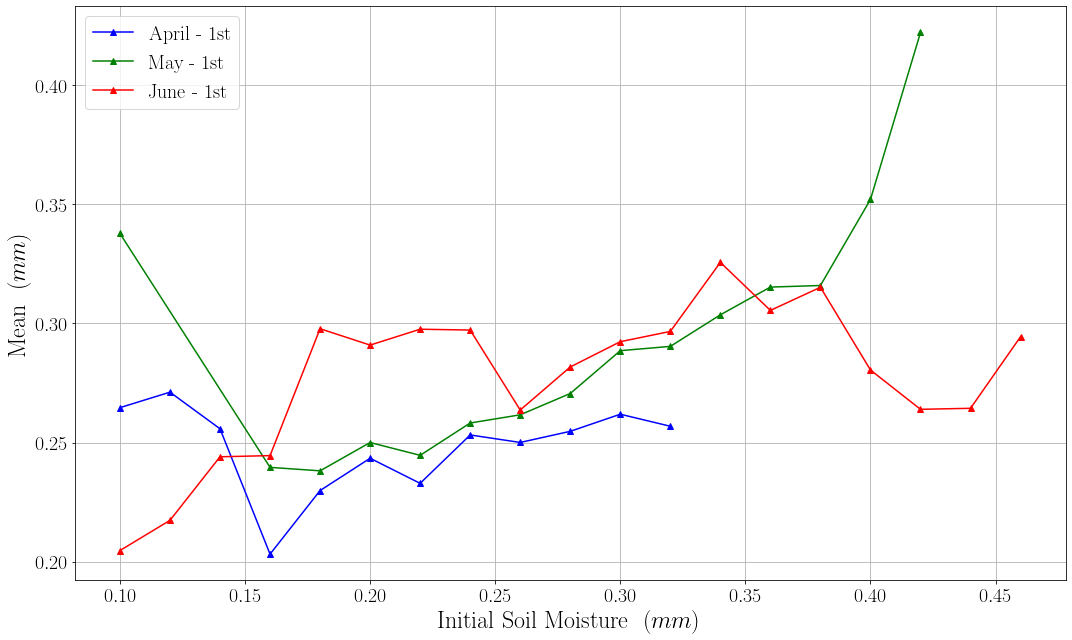

In [163]:
fig,ax = plt.subplots(figsize=(15, 9))
ax.tick_params(labelsize = 20)
ax.set_ylabel(r'Mean \ ($mm$)', fontsize = 24)
ax.set_xlabel(r'Initial Soil Moisture \ ($mm$)', fontsize = 24)
ax.tick_params(labelsize = 20)
plt.plot(mean_sm['smap'][4][1][:,0],mean_sm['smap'][4][1][:,1], color='blue', marker='^', label = 'April - 1st')
# plt.plot(mean_sm['smap'][4][4][:,0],mean_sm['smap'][4][4][:,1], color='blue', label = 'April - 4th')
plt.plot(mean_sm['smap'][5][1][:,0],mean_sm['smap'][5][1][:,1], color='g', marker='^',label = 'May - 1st')
# plt.plot(mean_sm['smap'][5][4][:,0],mean_sm['smap'][5][4][:,1], color='g', label = 'May - 4th')
plt.plot(mean_sm['smap'][6][1][:,0],mean_sm['smap'][6][1][:,1], color='red', marker='^', label = 'June - 1st')
# plt.plot(mean_sm['smap'][6][4][:,0],mean_sm['smap'][6][4][:,1], color='red', label = 'June - 4th')
ax.grid('major')
ax.legend(fontsize=20)
# ax.set_ylim([0,])
fig.tight_layout()
# fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/mean_sm_hourly.jpg', dpi=300)

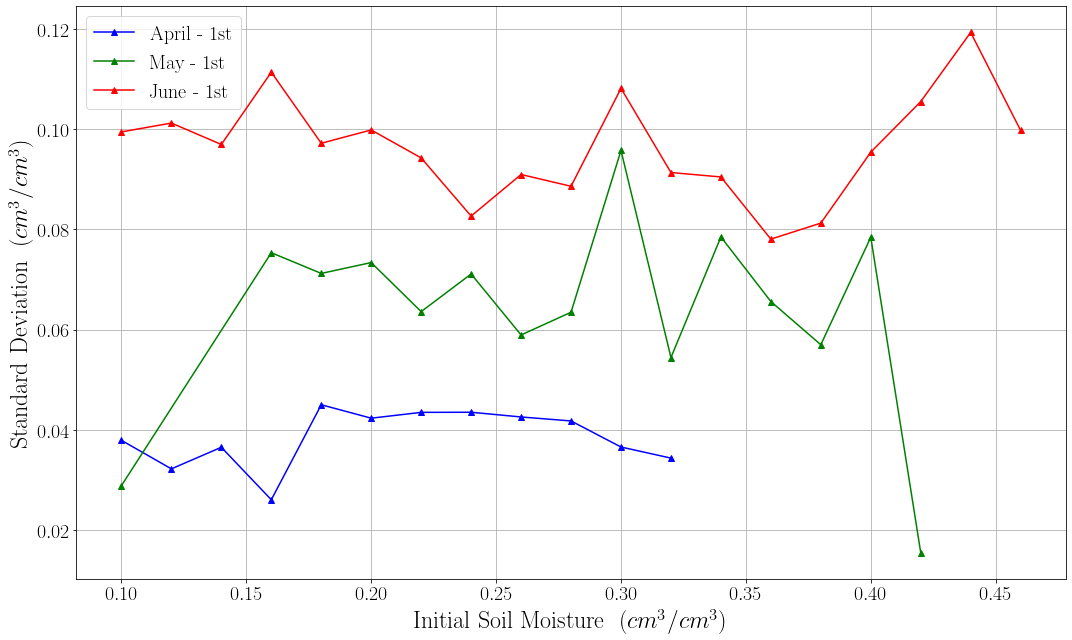

In [164]:
fig,ax = plt.subplots(figsize=(15, 9))
ax.tick_params(labelsize = 20)
ax.set_ylabel(r'Standard Deviation \ ($cm^3/cm^3$)', fontsize = 24)
ax.set_xlabel(r'Initial Soil Moisture \ ($cm^3/cm^3$)', fontsize = 24)
ax.tick_params(labelsize = 20)
plt.plot(sd_sm['smap'][4][1][:,0],sd_sm['smap'][4][1][:,1], color='blue', marker='^', label = 'April - 1st')
# plt.plot(sd_sm['smap'][4][4][:,0],sd_sm['smap'][4][4][:,1], color='blue', label = 'April - 4th')
plt.plot(sd_sm['smap'][5][1][:,0],sd_sm['smap'][5][1][:,1], color='g', marker='^',label = 'May - 1st')
# plt.plot(sd_sm['smap'][5][4][:,0],sd_sm['smap'][5][4][:,1], color='g', label = 'May - 4th')
plt.plot(sd_sm['smap'][6][1][:,0],sd_sm['smap'][6][1][:,1], color='red', marker='^', label = 'June - 1st')
# plt.plot(sd_sm['smap'][6][4][:,0],sd_sm['smap'][6][4][:,1], color='red', label = 'June - 4th')
ax.grid('major')
ax.legend(fontsize=20)
# ax.set_ylim([0,])
fig.tight_layout()
# fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/mean_sm_hourly.jpg', dpi=300)

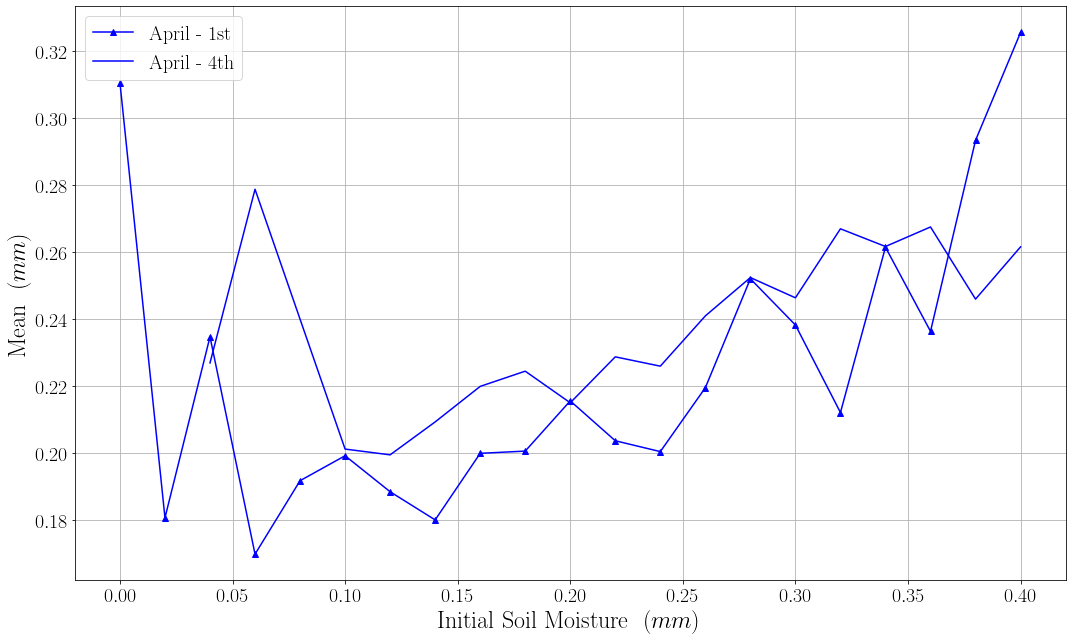

In [168]:
fig,ax = plt.subplots(figsize=(15, 9))
ax.tick_params(labelsize = 20)
ax.set_ylabel(r'Mean \ ($mm$)', fontsize = 24)
ax.set_xlabel(r'Initial Soil Moisture \ ($mm$)', fontsize = 24)
ax.tick_params(labelsize = 20)
plt.plot(mean_sm['smos'][4][1][:,0],mean_sm['smos'][4][1][:,1], color='blue', marker='^', label = 'April - 1st')
plt.plot(mean_sm['smos'][4][4][:,0],mean_sm['smos'][4][4][:,1], color='blue', label = 'April - 4th')
# plt.plot(mean_sm['smos'][5][1][:,0],mean_sm['smos'][5][1][:,1], color='g', marker='^',label = 'May - 1st')
# plt.plot(mean_sm['smos'][5][4][:,0],mean_sm['smos'][5][4][:,1], color='g', label = 'May - 4th')
# plt.plot(mean_sm['smos'][6][1][:,0],mean_sm['smos'][6][1][:,1], color='red', marker='^', label = 'June - 1st')
# plt.plot(mean_sm['smos'][6][4][:,0],mean_sm['smos'][6][4][:,1], color='red', label = 'June - 4th')
ax.grid('major')
ax.legend(fontsize=20)
# ax.set_ylim([0,])
fig.tight_layout()
# fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/mean_sm_hourly.jpg', dpi=300)

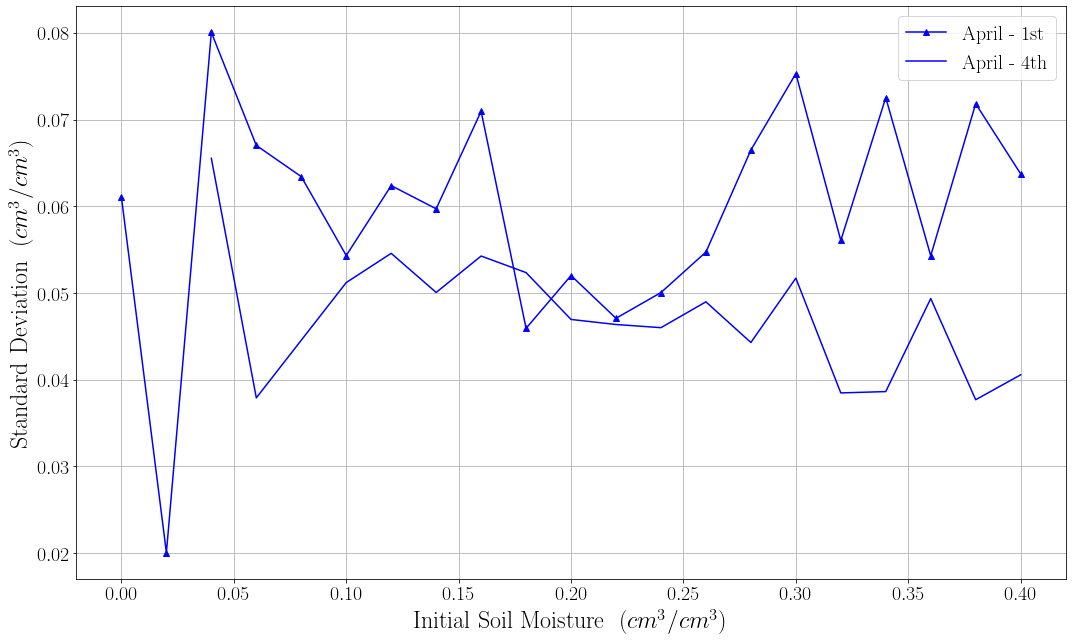

In [169]:
fig,ax = plt.subplots(figsize=(15, 9))
ax.tick_params(labelsize = 20)
ax.set_ylabel(r'Standard Deviation \ ($cm^3/cm^3$)', fontsize = 24)
ax.set_xlabel(r'Initial Soil Moisture \ ($cm^3/cm^3$)', fontsize = 24)
ax.tick_params(labelsize = 20)
plt.plot(sd_sm['smos'][4][1][:,0],sd_sm['smos'][4][1][:,1], color='blue', marker='^', label = 'April - 1st')
plt.plot(sd_sm['smos'][4][4][:,0],sd_sm['smos'][4][4][:,1], color='blue', label = 'April - 4th')
# plt.plot(sd_sm['smos'][5][1][:,0],sd_sm['smos'][5][1][:,1], color='g', marker='^',label = 'May - 1st')
# plt.plot(sd_sm['smos'][5][4][:,0],sd_sm['smos'][5][4][:,1], color='g', label = 'May - 4th')
# plt.plot(sd_sm['smos'][6][1][:,0],sd_sm['smos'][6][1][:,1], color='red', marker='^', label = 'June - 1st')
# plt.plot(sd_sm['smos'][6][4][:,0],sd_sm['smos'][6][4][:,1], color='red', label = 'June - 4th')
ax.grid('major')
ax.legend(fontsize=20)
# ax.set_ylim([0,])
fig.tight_layout()
# fig.savefig('/mnt/d/ubuntu/projects/gatechProjects/StochSM/figures/initial_results/mean_sm_hourly.jpg', dpi=300)